In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [3]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [4]:
## KEEPOUTPUT
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
d = pd.read_csv("train.csv")
d.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Se observan que columnas tienen valores nulos

In [5]:
d.isnull().any()

,0
ID,False
PERIODO,False
ESTU_PRGM_ACADEMICO,False
ESTU_PRGM_DEPARTAMENTO,False
ESTU_VALORMATRICULAUNIVERSIDAD,True
ESTU_HORASSEMANATRABAJA,True
FAMI_ESTRATOVIVIENDA,True
FAMI_TIENEINTERNET,True
FAMI_EDUCACIONPADRE,True
FAMI_TIENELAVADORA,True


In [6]:
k = d.isnull().sum() #Dataframe de sumatoria de datos perdidos
k[k != 0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773
FAMI_TIENEAUTOMOVIL,43623
ESTU_PAGOMATRICULAPROPIO,6498
FAMI_TIENECOMPUTADOR,38103
FAMI_TIENEINTERNET.1,26629


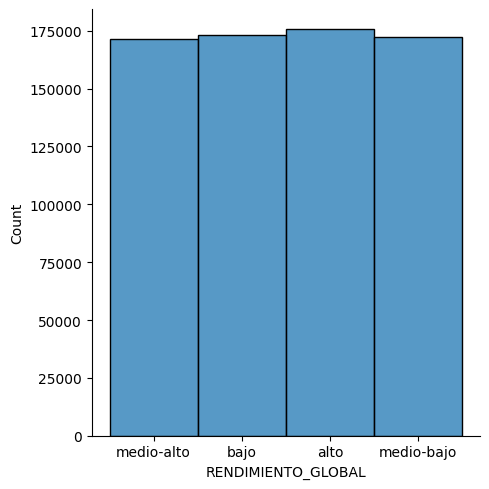

In [7]:
sns.displot(d["RENDIMIENTO_GLOBAL"]);

Se observa un comportamiento muy simetrico entre calificaciones

In [8]:
d.dtypes

,0
ID,int64
PERIODO,int64
ESTU_PRGM_ACADEMICO,object
ESTU_PRGM_DEPARTAMENTO,object
ESTU_VALORMATRICULAUNIVERSIDAD,object
ESTU_HORASSEMANATRABAJA,object
FAMI_ESTRATOVIVIENDA,object
FAMI_TIENEINTERNET,object
FAMI_EDUCACIONPADRE,object
FAMI_TIENELAVADORA,object


Gran cantidad de datos mezclados especialmente en columnas descriptivas, que serán utiles para el modelo de predicción

Debido a que en las columnas hay una gran cantidad de datos que son booleanos pero están mal escritos, o no de la manera adecuada para el modelo, los convertiremos a 'true' o 'false'

In [9]:
def mask(x):
  if x=="Si":
    return bool(True)
  elif x=="No":
    return bool(False)
  else:
    return


In [10]:
d.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [11]:
for i in ['FAMI_TIENEINTERNET','FAMI_TIENELAVADORA','FAMI_TIENEAUTOMOVIL','ESTU_PAGOMATRICULAPROPIO','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET.1']:
  d[i]=d[i].apply(mask)

In [12]:
d.head()


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,True,Técnica o tecnológica incompleta,True,...,N,False,True,True,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,False,Técnica o tecnológica completa,True,...,N,False,True,False,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,True,Secundaria (Bachillerato) completa,True,...,N,False,False,True,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,True,No sabe,True,...,N,False,True,True,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,True,Primaria completa,True,...,N,False,True,True,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [13]:
d['ESTU_PRIVADO_LIBERTAD'].value_counts(dropna=False)

,count
ESTU_PRIVADO_LIBERTAD,
N,692466
S,34


Observamos que en esta columna los datos tambien son booleanos, pero están escritos de otra forma por lo cual, también los convertimos

In [14]:
def mask1(x):
  if x=="S":
    return bool(True)
  elif x=="N":
    return bool(False)
  else:
    return

In [15]:
d['ESTU_PRIVADO_LIBERTAD']=d['ESTU_PRIVADO_LIBERTAD'].apply(mask1)

In [16]:
d.head()


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,True,Técnica o tecnológica incompleta,True,...,False,False,True,True,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,False,Técnica o tecnológica completa,True,...,False,False,True,False,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,True,Secundaria (Bachillerato) completa,True,...,False,False,False,True,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,True,No sabe,True,...,False,False,True,True,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,True,Primaria completa,True,...,False,False,True,True,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [17]:
d['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts(dropna=False)

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528
NaN,6287


In [18]:
mapa_matricula = {
    'Menos de 500 mil': 1,
    'Entre 500 mil y menos de 1 millón': 2,
    'Entre 1 millón y menos de 2.5 millones': 3,
    'Entre 2.5 millones y menos de 4 millones': 4,
    'Entre 4 millones y menos de 5.5 millones': 5,
    'Entre 5.5 millones y menos de 7 millones': 6,
    'Más de 7 millones': 7,
    'No pagó matrícula': 0,
}
d['VAL_MATRICULA_ORD'] = d['ESTU_VALORMATRICULAUNIVERSIDAD'].map(mapa_matricula)

In [19]:
ORDEN_RENDIMIENTO_GLOBAL= {
    'bajo': 1,
    'medio-bajo': 2,
    'medio-alto': 3,
    'alto': 4
}

d['RENDIMIENTO_GLOBAL_NUM'] = d['RENDIMIENTO_GLOBAL'].map(ORDEN_RENDIMIENTO_GLOBAL)

In [20]:
d.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,VAL_MATRICULA_ORD,RENDIMIENTO_GLOBAL_NUM
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,True,Técnica o tecnológica incompleta,True,...,True,True,Postgrado,medio-alto,0.322,0.208,0.310,0.267,6.0,3
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,False,Técnica o tecnológica completa,True,...,True,False,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,4.0,1
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,True,Secundaria (Bachillerato) completa,True,...,False,True,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,4.0,1
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,True,No sabe,True,...,True,True,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,5.0,4
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,True,Primaria completa,True,...,True,True,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,4.0,2


ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE	Estas son las columnas que faltan por tratar en cuanto a la transformación de los datos para un dataset más util y homogeneo para el modelo


In [21]:
for c in d.columns:
    print ("%20s"%c, d[c].dtype)


                  ID int64
             PERIODO int64
 ESTU_PRGM_ACADEMICO object
ESTU_PRGM_DEPARTAMENTO object
ESTU_VALORMATRICULAUNIVERSIDAD object
ESTU_HORASSEMANATRABAJA object
FAMI_ESTRATOVIVIENDA object
  FAMI_TIENEINTERNET object
 FAMI_EDUCACIONPADRE object
  FAMI_TIENELAVADORA object
 FAMI_TIENEAUTOMOVIL object
ESTU_PRIVADO_LIBERTAD bool
ESTU_PAGOMATRICULAPROPIO object
FAMI_TIENECOMPUTADOR object
FAMI_TIENEINTERNET.1 object
 FAMI_EDUCACIONMADRE object
  RENDIMIENTO_GLOBAL object
              coef_1 float64
              coef_2 float64
              coef_3 float64
              coef_4 float64
   VAL_MATRICULA_ORD float64
RENDIMIENTO_GLOBAL_NUM int64


In [22]:
d['ESTU_HORASSEMANATRABAJA'].value_counts(dropna=False)

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,249352
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191
NaN,30857


In [24]:
mapa_trabajo = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}

d['ESTU_HORASSEMANATRABAJA_ORD'] = d['ESTU_HORASSEMANATRABAJA'].astype(str).map(mapa_trabajo)
d['ESTU_HORASSEMANATRABAJA_ORD'] = d['ESTU_HORASSEMANATRABAJA_ORD'].fillna(-1)

In [26]:
d['FAMI_ESTRATOVIVIENDA'].value_counts(dropna=False)

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
NaN,32137
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [27]:
def mask2(x):
    if x=="Estrato 1":
      return int(1)
    elif x=="Estrato 2":
      return int(2)
    elif x=="Estrato 3":
      return int(3)
    elif x=="Estrato 4":
      return int(4)
    elif x=="Estrato 5":
      return int(5)
    elif x=="Estrato 6":
      return int(6)
    elif x=="Sin Estrato":
      return int(0)
    else:
      return

In [28]:
d['FAMI_ESTRATOVIVIENDA']=d['FAMI_ESTRATOVIVIENDA'].apply(mask2)

In [30]:
d['FAMI_EDUCACIONPADRE'].value_counts(dropna=False)

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
NaN,23178


In [32]:
mapa_educacion = {
    'Ninguno': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Técnica o tecnológica incompleta': 5,
    'Técnica o tecnológica completa': 6,
    'Educación profesional incompleta': 7,
    'Educación profesional completa': 8,
    'Postgrado': 9,
    'No sabe': -1,
    'No Aplica': -2
}
variables_educativas = ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']
for col in variables_educativas:
    d[f'{col}_ORD'] = d[col].map(mapa_educacion)

Ahora que ya tratamos todas las columnas con valores ordinales, y valores booleanos, vamos a tratar las columnas con variables categoricas

In [33]:
d['ESTU_PRGM_ACADEMICO'].value_counts(dropna=False)

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
DEPORTE Y ACTIVIDADA FISICA,1
QUIMICA Y FARMACIA,1
"LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES",1


En este se considera que lo mejor es dejarlo tal y como está ya que son muchisimos datos con poca repetibilidad en el dataset, una opción sería agruparlos por area de conocimiento lo cual queda pendiente

In [36]:
d['ESTU_PRGM_DEPARTAMENTO'].value_counts(dropna=False)

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


Nuevamente, se repite el mismo criterio anterior, pero esta vez no es posible categorizar los datos, a menos de que tomemos regiones geográficas especificas del país

En este caso ya que aun no se ha comprobado la relevancia de los datos NaN en las columnas aun no se decide si imputar o rellenar, para esto también sería correcto, construir gráficas para observar su comportamiento, y observar cómo se comportan bajo diferentes modelos con diferentes metodos, ya sea imputación, reemplazarlos por un valor fijo como la media o un 0, o aplicarles una distribución especifica de acuerdo a cómo se comporten los datos.